Text(0, 0.5, 'X2')

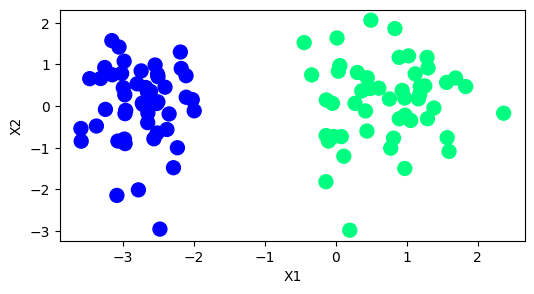

In [9]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

#creating synthetic data with two linearly separable classes
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,
                           random_state=41,hypercube=False,class_sep=17)

#scatter plot
plt.figure(figsize=(6,3))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.xlabel('X1')
plt.ylabel('X2')

Weights (Perceptron Trick: Unit Step Function)
-----------------------------------------------
W0:  1.3000000000000003
W1:  0.9582044591766712
W2:  0.45500818150958255




(-3.0, 2.0)

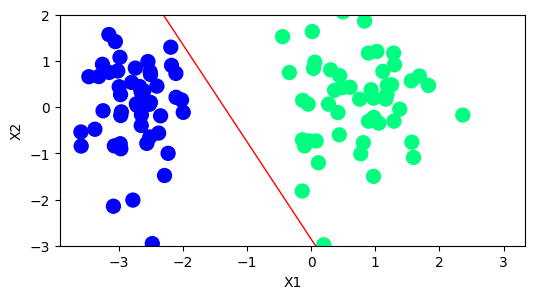

In [10]:
#Perceptron Trick algorithm with Unit Step function to predict o/p

def perceptron_unitstep(X,y):

    X1 = np.insert(X,0,1,axis=1) #inserting bias term
    weights1 = np.ones(X1.shape[1]) #weights initialization
    lr1 = 0.1 #defining learning_rate

    #iterating to get weights
    for i1 in range(1000):
        j1 = np.random.randint(0, X1.shape[0]) #random selection of index
        y_hat_us = unitstep(np.dot(weights1, X1[j1])) #o/p prediction with Unit Step function
        weights1 = weights1 + (lr1 * (y[j1] - y_hat_us) * X1[j1]) #updating weights

    return weights1[0], weights1[1:] #returning final weights

#defining Unit Step function
def unitstep(z1):
    return 1 if z1>=0 else 0

#calling function
intercept_us, coef_us = perceptron_unitstep(X,y)

#printing weights
print('Weights (Perceptron Trick: Unit Step Function)')
print('-----------------------------------------------')
print('W0: ',intercept_us)
print('W1: ',coef_us[0])
print('W2: ',coef_us[1])
print('\n')

#calculating slope and intercept
m1 = -coef_us[0]/coef_us[1]
b1 = - (intercept_us/coef_us[1])

#defining binary classifier
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1+b1

#plotting classifier 
plt.figure(figsize=(6,3))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input1,y_input1,color='red',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-3,2)

Weights (Perceptron Trick: Sigmoid Function)
--------------------------------------------
W0:  2.9497710345456674
W1:  3.1570758140458652
W2:  0.08875313581867382




(-3.0, 2.0)

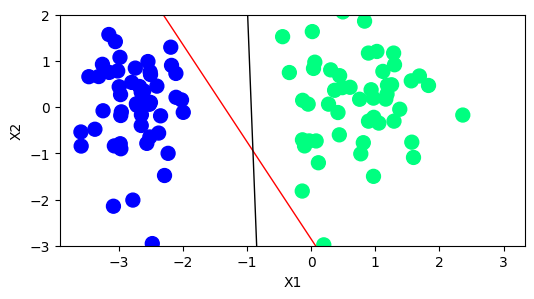

In [11]:
#Perceptron Trick algorithm with Sigmoid function to predict o/p

def perceptron_sigmoid(X,y):

    X2 = np.insert(X,0,1,axis=1) #inserting bias term
    weights2 = np.ones(X2.shape[1]) #weights initialization
    lr2 = 0.1 #defining learning_rate

    #iterating to get weights
    for i2 in range(1000):
        j2 = np.random.randint(0, X2.shape[0]) #random selection of index
        y_hat_sig = sigmoid(np.dot(weights2, X2[j2])) #o/p prediction with Sigmoid function
        weights2 = weights2 + (lr2 * (y[j2] - y_hat_sig) * X2[j2]) #updating weights

    return weights2[0], weights2[1:] #returning final weights

#defining Sigmoid function
def sigmoid(z2):
    return 1 / (1 + np.exp(-z2))

#calling function
intercept_sig,coef_sig = perceptron_sigmoid(X,y)

#printing weights
print('Weights (Perceptron Trick: Sigmoid Function)')
print('--------------------------------------------')
print('W0: ',intercept_sig)
print('W1: ',coef_sig[0])
print('W2: ',coef_sig[1])
print('\n')

#calculating slope and intercept
m2 = -coef_sig[0]/coef_sig[1]
b2 = - (intercept_sig/coef_sig[1])

#defining binary classifier
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input2+b2

#plotting classifier
plt.figure(figsize=(6,3))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input1,y_input1,color='red',linewidth=1)
plt.plot(x_input2,y_input2,color='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-3,2)

Weights (Scikit-learn - Logistic Regression)
----------------------------------------------
W0:  [2.97253074]
W1:  2.645389025148161
W2:  0.02659292268727973


(-3.0, 2.0)

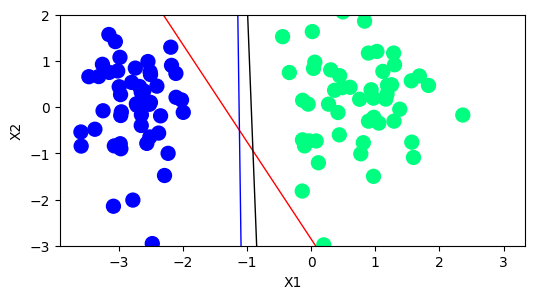

In [13]:
#applying Scikit-learn LogisticRegression class

from sklearn.linear_model import LogisticRegression #importing class
logreg_obj = LogisticRegression() #creating an object
logreg_obj.fit(X,y) #model fitting

#printing weights
print('Weights (Scikit-learn - Logistic Regression)')
print('----------------------------------------------')
print('W0: ',logreg_obj.intercept_)
print('W1: ',logreg_obj.coef_[0][0])
print('W2: ',logreg_obj.coef_[0][1])

#calculating slope and intercept
m3 = - logreg_obj.coef_[0][0]/logreg_obj.coef_[0][1]
b3 = - logreg_obj.intercept_/logreg_obj.coef_[0][1]

#defining binary classifier
x_input3 = np.linspace(-3,3,100)
y_input3 = m3*x_input3+b3

#plotting classifier
plt.figure(figsize=(6,3))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input1,y_input1,color='red',linewidth=1)
plt.plot(x_input2,y_input2,color='black',linewidth=1)
plt.plot(x_input3,y_input3,color='blue',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.ylim(-3,2)